# Feature Engineering for Quantitative Stock Analysis

## Analytical Framework

This notebook implements a comprehensive feature engineering pipeline that transforms raw financial and economic data into predictive features suitable for quantitative modeling. The approach systematically creates features that capture different aspects of market behavior and economic conditions that influence equity price movements.

## Feature Engineering Strategy

Our feature engineering methodology addresses several key analytical dimensions:

**Technical Analysis Features**: We implement classical technical indicators including moving averages, momentum oscillators, and volatility measures. These features capture price action patterns and market sentiment that have proven predictive value in equity markets.

**Economic Context Features**: Raw economic indicators are transformed into more analytically useful derivatives such as year-over-year inflation rates, yield curve spreads, and policy rate differentials. These transformations capture the economic dynamics that drive equity risk premiums.

**Market Relative Features**: Features are engineered to capture relative performance versus market benchmarks and sector indices, providing context for idiosyncratic versus systematic risk factors.

**Temporal Structure**: The feature engineering process creates appropriate lag structures and rolling window statistics to capture the temporal dependencies inherent in financial time series data.

The resulting feature set provides a comprehensive foundation for quantitative modeling by capturing both fundamental economic drivers and technical market dynamics across multiple time horizons.


## Implementation Overview

The feature engineering process utilizes modularized functions that handle different aspects of the transformation pipeline. This approach ensures reproducibility and maintainability while allowing for systematic validation of each feature engineering step.

The implementation follows a structured workflow that processes raw data through multiple transformation stages, each designed to extract specific types of predictive information from the underlying financial and economic data.

In [1]:
# Initialize feature engineering pipeline
import sys
sys.path.append("../src")
from feature_engineering import (
    setup_directories, 
    load_stock_data, 
    process_economic_data, 
    process_market_data,
    combine_all_data, 
    calculate_technical_indicators, 
    process_economic_features
)

# Define analysis target
ticker = input("Enter the ticker symbol to analyze (or press Enter to use AAPL): ").upper() or "AAPL"
print(f"Feature engineering analysis for {ticker}")

# Initialize data processing environment
setup_directories(ticker)

# Load primary dataset and establish temporal scope
stock_data, start_date, end_date = load_stock_data(ticker)
print(f"Dataset: {len(stock_data)} observations from {start_date.date()} to {end_date.date()}")



🔧 Running Complete Feature Engineering Pipeline
Analyzing data for MSFT
📁 Setting up directories...
📊 Loading stock data...
Loading stock data...
Loaded stock data with shape (752, 6)
   Loaded 752 trading days from 2022-06-22 to 2025-06-20


🏛️ Processing economic data...

Processing daily economic data...
Loaded daily economic data with 790 rows
Forward filled Treasury_10Y
Forward filled Treasury_3M
Forward filled Fed_Funds_Rate
Forward filled and lagged CPI
Forward filled and lagged PPI
Forward filled and lagged Unemployment_Rate
Forward filled and lagged Industrial_Production
Forward filled and lagged Consumer_Sentiment
Forward filled and lagged Housing_Starts


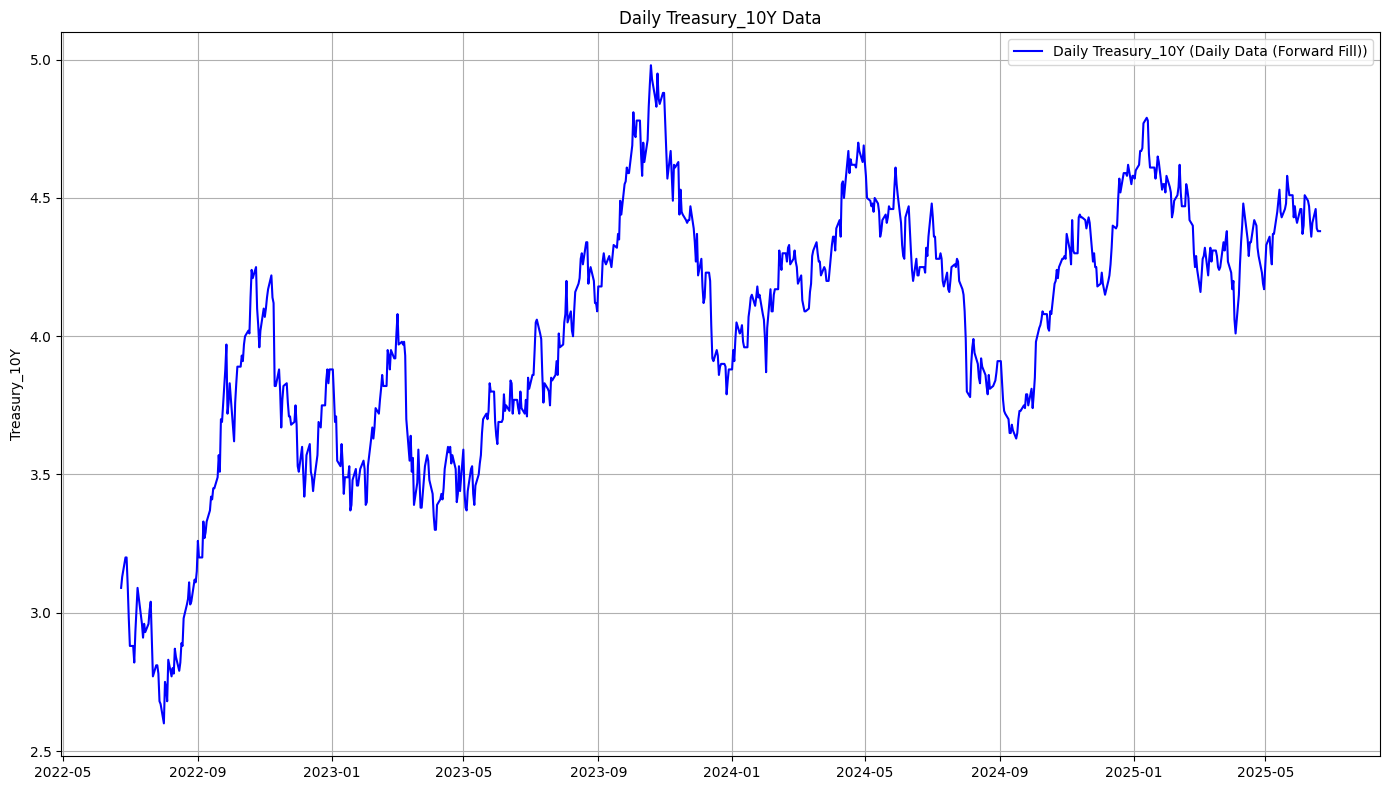

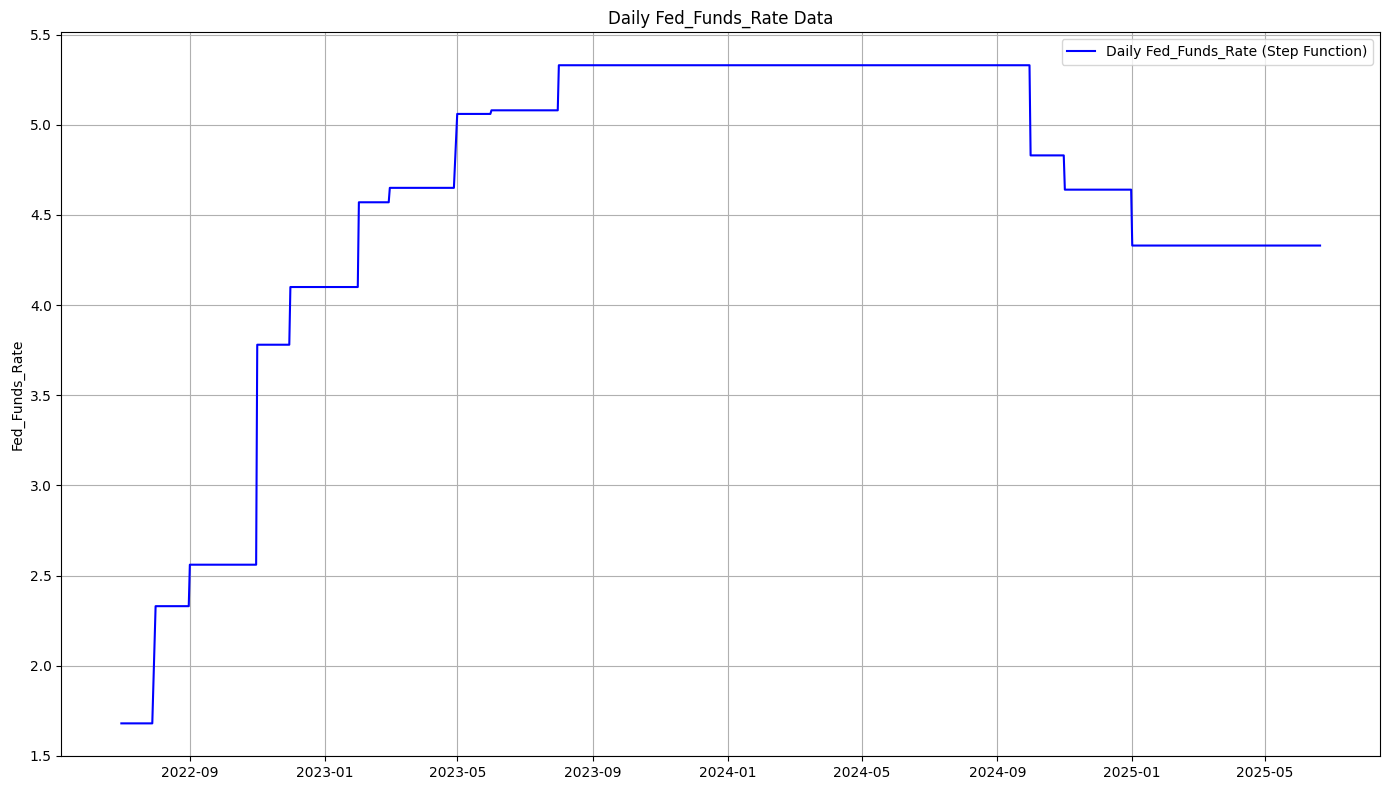

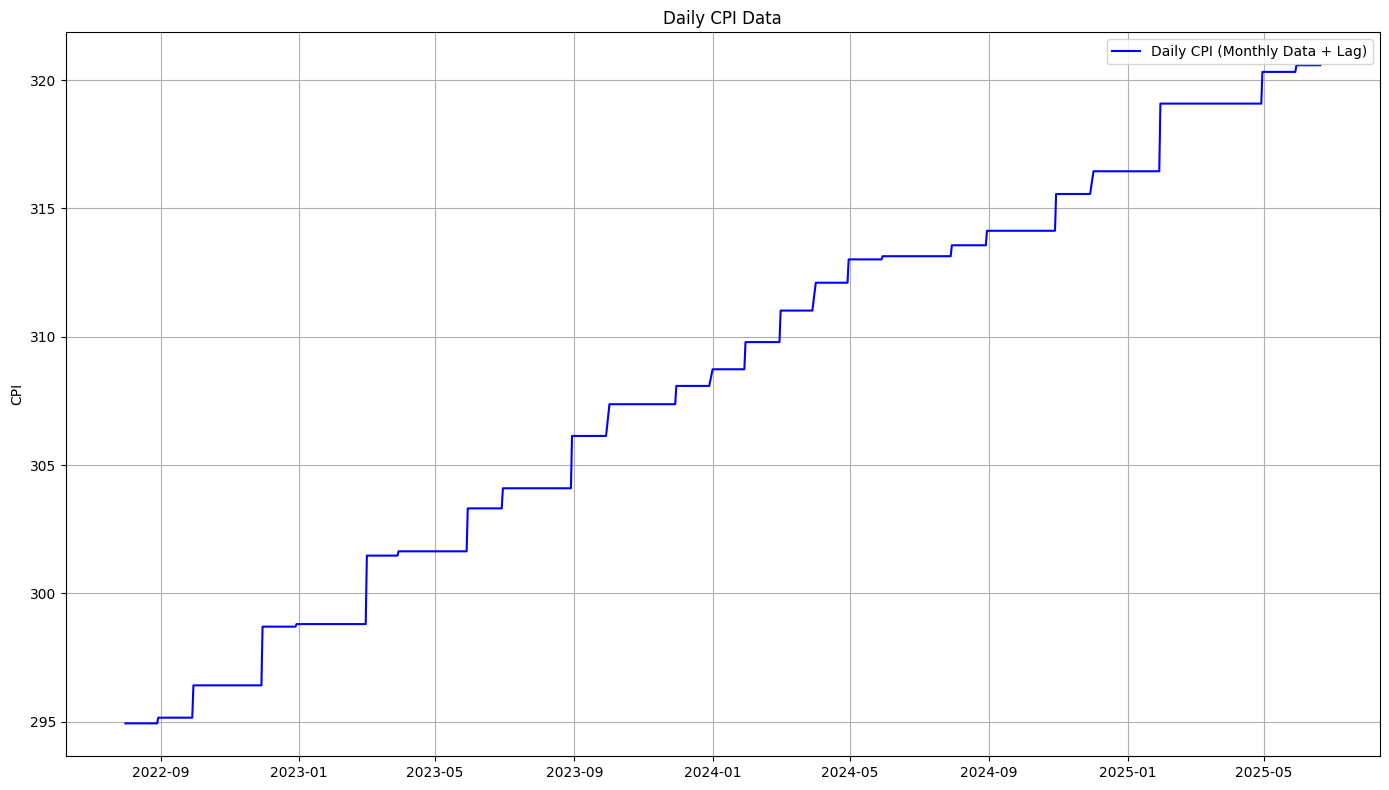


Processed daily economic data saved to ../data/processed/MSFT/economic_data_daily.csv
Shape: (783, 9)
   Processed 9 economic indicators


In [2]:
# Process economic indicators with appropriate lag adjustments
economic_data = process_economic_data(ticker, start_date, end_date)
print(f"Economic indicators processed: {len(economic_data.columns) if not economic_data.empty else 0} series")
print("Applied forward-fill interpolation and lag adjustments for reporting delays")



In [3]:
# Process market context data with gap handling
market_data = process_market_data(ticker, start_date, end_date)
print(f"Market context series processed: {len(market_data.columns) if not market_data.empty else 0}")
print("Applied forward-fill methodology for holiday and weekend gaps")

🌍 Processing market data...

Forward filling market data...
Market data forward filled and saved to ../data/processed/MSFT/market_data_filled.csv
   Processed 5 market indices


In [4]:
# Integrate all data sources with temporal alignment
combined_data = combine_all_data(ticker)
print(f"Unified dataset created: {combined_data.shape if not combined_data.empty else 'Integration failed'}")
print("Data sources aligned on trading day calendar with proper date matching")

🔗 Combining all data sources...
Loaded stock_data with shape (752, 5)
Combined DataFrame shape: (752, 19)
Combined DataFrame saved to ../data/processed/MSFT/combined_daily_data.csv
   Combined dataset shape: (752, 19)


In [5]:
# Generate technical analysis features
technical_indicators, combined_with_tech = calculate_technical_indicators(ticker)
print(f"Technical indicators generated: {len(technical_indicators.columns) if not technical_indicators.empty else 0}")
print("Includes moving averages, momentum oscillators, volatility measures, and volume indicators")

📈 Calculating technical indicators...

Calculating technical indicators from combined data...
Technical indicators calculated and saved to ../data/processed/MSFT/technical_indicators.csv
Combined Technical indicators with combined_daily_data and saved to ../data/processed/MSFT/technical_indicators_combined.csv
   Created 8 technical indicators


In [6]:
# Create derived economic features and finalize dataset
economic_features, final_features = process_economic_features(ticker)
print(f"Economic derivatives created: {len(economic_features.columns) if not economic_features.empty else 0}")
print("Generated inflation rates, yield spreads, and policy rate differentials")

💰 Creating economic features...
Processing economic indicators features from technical_indicators_combined...
Calculated CPI year-over-year change (daily aligned)
Calculated PPI year-over-year change (daily aligned)
Calculated yield curve spread (10Y-3M)
Calculated Fed Funds to 10Y Treasury spread
Calculated day-over-day change for Treasury_10Y
Calculated day-over-day change for Treasury_3M
Saving economic features...
Economic features (daily) saved to ../data/processed/MSFT/economic_features.csv
Saving combined features...
Combined features saved to ../data/final/MSFT/preprocessed_features.csv
   Created 6 derived economic features


In [7]:
# Feature engineering pipeline completed
print(f"\nFeature engineering completed for {ticker}")
print(f"Final dataset dimensions: {final_features.shape if not final_features.empty else 'Processing failed'}")
if not final_features.empty:
    print(f"Total engineered features: {len(final_features.columns)}")
    print(f"Feature categories: Technical indicators, economic derivatives, market context")
    print(f"Output location: ../data/final/{ticker}/preprocessed_features.csv")
    print("Dataset ready for feature forecasting and model training phases")


🎉 Feature Engineering Complete
Final dataset: (451, 33)
Total features created: 33
Sample features: ['CPI', 'Close', 'Consumer_Sentiment', 'Dow_Jones', 'Fed_Funds_Rate', 'High', 'Housing_Starts', 'Industrial_Production', 'Low', 'NASDAQ']

Final dataset saved to: ../data/final/MSFT/preprocessed_features.csv
